In [147]:
import requests
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime
import os

In [148]:
directory = "../Spotify_API_scrape/by_year_data"

In [149]:
total_file = None
first_time = True

for filename in os.listdir(directory):
    f = os.path.join(directory, filename)
    if ".csv" in f: 
        year = filename.split("_")[0]
        curr_file = pd.read_csv(f)
        curr_file["Billboard Year"] = [int(year)] * curr_file.shape[0]
    
        if first_time: 
            total_file = curr_file
            first_time = False
        else: 
            total_file = pd.concat([curr_file, total_file])

In [150]:
total_file[total_file["Billboard Year"] == 2000]

,Track Name,Artists,Genres,Duration (ms),Explicit,Popularity,Available Markets,Artist Country,Billboard Year
0,Breathe,Faith Hill,country,250546,False,65,184,US,2000
1,Smooth (feat. Rob Thomas),"Santana, Rob Thomas","latin rock, orchestral",294986,False,68,185,"US, NO",2000
2,Maria Maria (feat. The Product G&B),"Santana, The Product G&B","latin rock, american",261973,False,71,185,"US, US",2000
3,I Wanna Know,Joe,"r&b, smooth r&b, quiet storm",296693,False,66,185,GB,2000
4,Everything You Want,Vertical Horizon,alternative rock,257066,False,62,183,Unknown,2000
...,...,...,...,...,...,...,...,...,...
95,I Don't Wanna,Aaliyah,r&b,255093,True,48,181,US,2000
96,"Independent Women, Pt. 1",Destiny's Child,pop,221133,False,63,184,US,2000
97,Gotta Tell You,Samantha Mumba,contemporary r&b,201066,False,36,3,IE,2000
98,Waiting for Tonight,Jennifer Lopez,pop,246426,False,64,185,US,2000


In [111]:
params = {
  "engine": "google_trends",
  "data_type": "TIMESERIES",
  "date": "2005-01-01 2025-03-01",
  "api_key": "eecb50b3d1430be3cb8187afb5d46fea26d2c3e4355b82de28d503b1a8aa2e8e"
}

In [112]:
def get_time_series(query): 
    params["q"] = query
    r = requests.get(url = "https://serpapi.com/search.json", params = params)

    my_json = r.json()

    timeline_data = my_json["interest_over_time"]["timeline_data"]

    dates = []
    value = []
    for item in timeline_data: 
        dates.append(item['date'])
        value.append(float(item['values'][0]['value']))
        
    return dates, value

In [113]:
dates, freq = get_time_series('Mariah Carey')

In [114]:

# day level granularity 
# dates_converted = []
# for date in dates: 
#     if len(date) < 21:
#         date = date.replace("\u2009","")
#         curr_date = date.split("–")
#         year = curr_date[1].split(",")[1]
#         year = year.split(" ")[1]
#         month_day = curr_date[0].split(",")[0]
#         dates_convert.append(month_day + " " + year)
#     else: 
#         date = date.replace("\u2009","")
#         curr_date = date.split("–")[0]
#         dates_convert.append(curr_date.replace(",",""))

# month level granulatity 
# dates_converted = []
# for date in dates: 
    

In [115]:
df = pd.DataFrame({'Date': dates, 'total': freq})

In [116]:
df

,Date,total
0,Jan 2005,18.0
1,Feb 2005,20.0
2,Mar 2005,35.0
3,Apr 2005,64.0
4,May 2005,66.0
...,...,...
238,Nov 2024,15.0
239,Dec 2024,26.0
240,Jan 2025,6.0
241,Feb 2025,6.0


In [117]:
df['Date'] = pd.to_datetime(df['Date'])

/var/folders/tr/3zw9td7531z0_hhwc8105rv00000gn/T/ipykernel_42824/2394721818.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Date'])


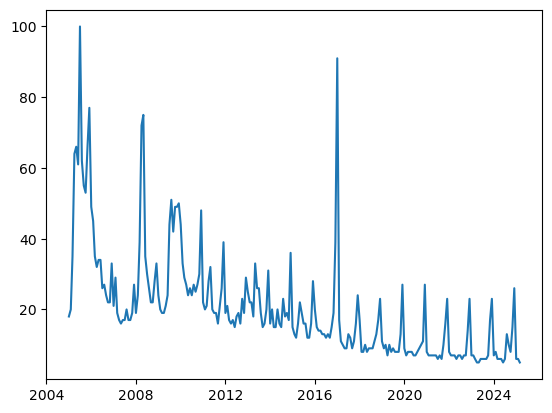

In [118]:
plt.plot(df['Date'], df['total'])